# CASE STUDY - BANK LOAN DETAILS

### 1.Analysing Application Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("application_data.csv")
df1 = pd.read_csv("previous_application.csv")

In [3]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### 1.1 Identification of variables and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.shape

(307511, 122)

#### 1.2 Analyzing basic metrics

In [6]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### 1.3 Finding missing values and dropping the columns

In [7]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

#### Finding percentage of missing values

In [8]:

round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False)


COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

#### Dropping missing values with more than 50%

In [9]:
df = df.loc[:,df.isnull().sum()/len(df.index)<=0.5]
df.shape


(307511, 81)

#### Dropping unnecessary columns which have missing values less than 13%

In [10]:
Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

df.drop(labels=Drop_col,axis=1,inplace=True)

In [11]:
df.shape

(307511, 42)

#### 1.4 Imputing missing values

####  OCCUPATION_TYPE

In [12]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
occ=df.OCCUPATION_TYPE.mode()[0]
occ

'Laborers'

OCCUPATION_TYPE can be imputed with the mode value of the column i.e Laborers

#### NAME_TYPE_SUITE

In [14]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [15]:
nts=df.NAME_TYPE_SUITE.mode()[0]
nts

'Unaccompanied'

NAME_TYPE_SUITE is a categorical column which can be imputed using the mode of the column i.e Unaccompanied

#### EXT_SOURCE_2

<AxesSubplot:>

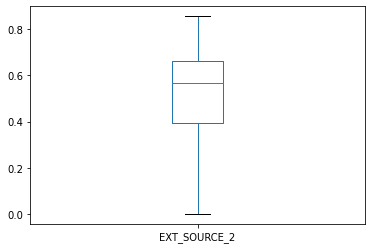

In [16]:
df['EXT_SOURCE_2'].plot(kind='box')

In [17]:
ext = round(df['EXT_SOURCE_2'].mean(),2)
ext

0.51

EXT_SOURCE_2 no outliers, hence can be imputed with mean value

#### AMT_GOODS_PRICE

<AxesSubplot:>

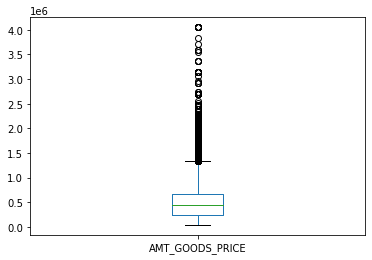

In [18]:
df['AMT_GOODS_PRICE'].plot(kind='box')

In [19]:
#as it has outliers,median value can be imputed
amt = round(df['AMT_GOODS_PRICE'].median(),2)
amt

450000.0

AMT_GOODS_PRICE has outliers, it can be imputed using the median of the coumn i.e. 450000.0

#### AMT_ANNUITY

<AxesSubplot:>

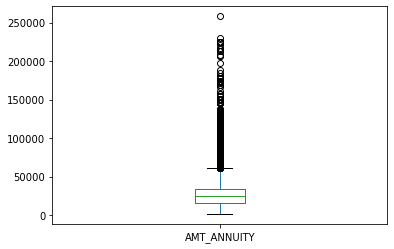

In [20]:
df['AMT_ANNUITY'].plot(kind='box')

In [21]:
amt_a = round(df['AMT_ANNUITY'].median(),2)
amt_a

24903.0

AMT_ANNUITY has outliers and can be imputed using the median of the coumn i.e. 24903.0

#### 1.5 Checking data types

In [22]:
#changing negative to positive values¶
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]=abs(df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']])
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
count      307511.000000    307511.000000            307511.000000   
mean         4986.120328      2994.202373                12.063419   
std          3522.886321      1509.450419                 3.265832   
min             0.000000         0.000000                 0.000000   
25%          2010.000000      1720.000000                10.000000   
50%          4504.000000      3254.000000                12.000000   
75%          7479.500000      4299.000000                14.000000   
max         24672.000000      7197.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                307511.000000           307511.000000   
mean                      0.040659                0.078173   
std                       0.197499                0.268444   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
count           307511.000000            307511.000000  3.068510e+05   
mean                 0.230454                 0.179555  5.143927e-01   
std                  0.421124                 0.383817  1.910602e-01   
min                  0.000000                 0.000000  8.173617e-08   
25%                  0.000000                 0.000000  3.924574e-01   
50%                  0.000000                 0.00000

In [23]:
# converting int to object
df[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']] = df[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
#Making Gender more readable
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [25]:
#dropping code_gender=XNA from the dataset
df = df[df['CODE_GENDER']!='XNA']
df['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)
df['CODE_GENDER'].value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

In [26]:
#### convert days_birth colun to age (age in years = age in days / 365)
df['YEARS_BIRTH']= (df['DAYS_BIRTH']/365).astype('int64')
##drop DAYS_BIRTH column as it is not required for further analysis
df.drop(['DAYS_BIRTH'], inplace=True, axis=1)


### 2. Analysing Previous Application Dataset

#### 2.1 Identifying data types and variables

In [27]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [29]:
df1.shape

(1670214, 37)

#### 2.2 Analyzing basic metrics

In [30]:
df1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### 2.3 Finding missing values in rows and columns

In [31]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [32]:
#Finding percentage of missing values
round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

#### dropping values which are greater than 50% 

In [33]:
df1 = df1.loc[:,df1.isnull().sum()/len(df1.index)<=0.5]

In [34]:
df1.shape

(1670214, 33)

In [35]:
df1 = df1.sort_values('SK_ID_PREV', ascending=False).drop_duplicates('SK_ID_CURR')

In [36]:
df1[df1['DAYS_TERMINATION'] > 0].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
888701      2843497      451578         Cash loans     9175.185   
1345642     2843496      425374    Revolving loans    31500.000   
298226      2843493      337804    Revolving loans     2250.000   
1489940     2843491      107385         Cash loans    25421.985   
728908      2843487      424008     Consumer loans     7179.795   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
888701         132482.97   149969.97        132482.97   
1345642        630000.00   630000.00        630000.00   
298226          45000.00    45000.00         45000.00   
1489940        841500.00   963684.00        841500.00   
728908          78402.87    78399.00         78402.87   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
888701                   WEDNESDAY                       11   
1345642                   THURSDAY                       15   
298226                    THURSDAY                       17   
1489940                     FRIDAY                       12   
728908                      FRIDAY                       15   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
888701                            Y                       0   
1345642                           Y                       1   
298226                            Y                       1   
1489940                           Y                       1   
728908                            Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
888701                     XNA             Approved           -618   
1345642                    XAP             Approved           -465   
298226                     XAP             Approved           -459   
1489940                    XNA             Approved           -304   
728908                     XAP             Approved           -264   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
888701   Cash through the bank                XAP             NaN   
1345642                    XNA                XAP   Unaccompanied   
298226                     XNA                XAP   Unaccompanied   
1489940  Cash through the bank                XAP   Unaccompanied   
728908   Cash through the bank                XAP   Unaccompanied   

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
888701          Repeater                 XNA           Cash            x-sell   
1345642         Repeater                 XNA          Cards            x-sell   
298226          Repeater                 XNA          Cards           walk-in   
1489940         Repeater                 XNA           Cash            x-sell   
728908          Repeater           Computers            POS               XNA   

                    CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
888701   Credit and cash offices                -1                   XNA   
1345642  Credit and cash offices                -1                   XNA   
298226   Credit and cash offices                -1                   XNA   
1489940  Credit and cash offices                -1                   XNA   
728908              Country-wide               150  Consumer electronics   

         CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION  \
888701          24.0           middle             Cash Street: middle   
1345642          0.0              XNA                     Card X-Sell   
298226           0.0              XNA                     Card Street   
1489940         60.0       low_action                Cash X-Sell: low   
728908          12.0       low_action  POS household without interest   

         DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
888701             365243.0          -588.0                      102.0   
1345642              -454.0          -423.0                   365243.0   
298226               -438.0          -410.0                   36

In [37]:
df1.shape

(338857, 33)

#### Renaming column names

In [38]:
df1_1 = df1[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION']]
df1_1.head()

SK_ID_CURR  AMT_CREDIT NAME_CONTRACT_STATUS CODE_REJECT_REASON  \
205485      406596    30912.75         Unused offer             CLIENT   
717142      140761    41499.00         Unused offer             CLIENT   
886179      237546    60673.50              Refused              LIMIT   
359118      100125    59503.50              Refused                SCO   
70058       250234   108180.00              Refused                SCO   

       NAME_YIELD_GROUP  DAYS_TERMINATION  
205485              XNA               NaN  
717142              XNA               NaN  
886179           middle               NaN  
359118           middle               NaN  
70058        low_action               NaN

In [39]:
names = {'AMT_CREDIT': 'PREV_AMT_CREDIT', 'NAME_CONTRACT_STATUS': 'PREV_CONTRACT_STATUS',
         'DAYS_TERMINATION':'PREV_DAYS_TERMINATION', 'CODE_REJECT_REASON':'PREV_REJECT_REASON',
        'NAME_YIELD_GROUP':'PREV_YIELD_GROUP'}

df1_1 = df1_1.rename(columns=names)
df1_1.head()

SK_ID_CURR  PREV_AMT_CREDIT PREV_CONTRACT_STATUS PREV_REJECT_REASON  \
205485      406596         30912.75         Unused offer             CLIENT   
717142      140761         41499.00         Unused offer             CLIENT   
886179      237546         60673.50              Refused              LIMIT   
359118      100125         59503.50              Refused                SCO   
70058       250234        108180.00              Refused                SCO   

       PREV_YIELD_GROUP  PREV_DAYS_TERMINATION  
205485              XNA                    NaN  
717142              XNA                    NaN  
886179           middle                    NaN  
359118           middle                    NaN  
70058        low_action                    NaN

#### 2.4 Imputing missing values

In [40]:
df1_1.PREV_DAYS_TERMINATION.value_counts(normalize=True)

 365243.0    0.232769
-9.0         0.000909
-15.0        0.000909
-144.0       0.000905
-17.0        0.000901
-177.0       0.000901
-5.0         0.000897
-163.0       0.000897
-169.0       0.000888
-60.0        0.000884
-58.0        0.000880
-93.0        0.000872
-170.0       0.000872
-36.0        0.000872
-269.0       0.000868
-233.0       0.000863
-142.0       0.000859
-23.0        0.000859
-158.0       0.000855
-29.0        0.000855
-164.0       0.000855
-46.0        0.000851
-37.0        0.000851
-236.0       0.000851
-149.0       0.000847
-212.0       0.000847
-162.0       0.000847
-152.0       0.000843
-150.0       0.000843
-131.0       0.000838
-205.0       0.000838
-274.0       0.000838
-246.0       0.000834
-8.0         0.000834
-73.0        0.000834
-339.0       0.000830
-198.0       0.000830
-241.0       0.000830
-243.0       0.000830
-107.0       0.000826
-303.0       0.000826
-109.0       0.000826
-305.0       0.000826
-64.0        0.000822
-65.0        0.000822
-227.0    

In [41]:
df1_1.PREV_DAYS_TERMINATION[df1_1.PREV_DAYS_TERMINATION > 0].value_counts()

365243.0    56079
Name: PREV_DAYS_TERMINATION, dtype: int64

In [42]:
# Replace values with NaN

df1_1.PREV_DAYS_TERMINATION.replace({365243.0 : np.NaN}, inplace=True)
df1_1.PREV_DAYS_TERMINATION[df1_1.PREV_DAYS_TERMINATION > 0].value_counts()

Series([], Name: PREV_DAYS_TERMINATION, dtype: int64)

### 3. Merging Application Dataset with Previous Application Dataset

In [43]:
df = pd.merge(left=df,right=df1_1, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans        Male            N   
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637             3648.0   
1                    0.003541           1188             1186.0   
2                    0.010032            225             4260.0   
3                    0.008019           3039             9833.0   
4                    0.028663           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                       10                          0   
1                       11                          0   
2                        9                          0   
3                       17                          0   
4                       11                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      1                       1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246                       1.0   
2              Government      0.555912                       0.0   
3  Business Entity Type 3      0.650442                       2.0   
4                Religion      

In [44]:
df.shape

(307507, 47)

### 4. Handling Outliers

#### AMT_ANNUITY variable

In [45]:
df.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

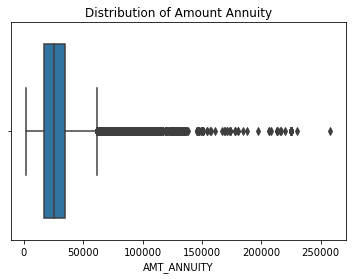

In [46]:
sns.boxplot(df.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

In [47]:
##Remove the outliers
df=df[df['AMT_ANNUITY'] <= 200000]

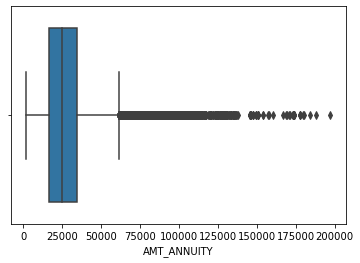

In [48]:
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

#### AMT_INCOME_TOTAL 

In [49]:
df.AMT_INCOME_TOTAL.describe()

count    3.074590e+05
mean     1.686974e+05
std      2.367921e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

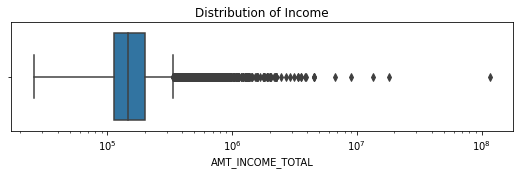

In [50]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [51]:
df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    146250.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    468000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [52]:
##Remove the outliers
df=df[df['AMT_INCOME_TOTAL'] <= 5*pow(10,6)]

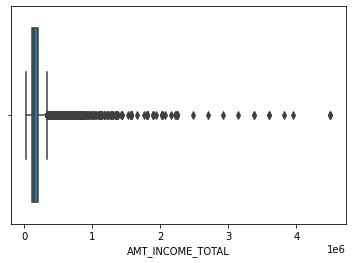

In [53]:
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

#### AMT_CREDIT

In [54]:
df.AMT_CREDIT.describe()

count    3.074540e+05
mean     5.988233e+05
std      4.020761e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

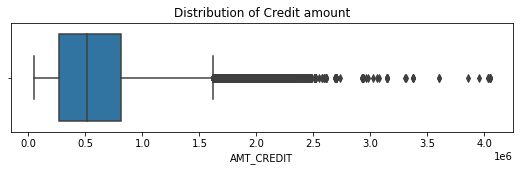

In [55]:
plt.figure(figsize=(9,2))
sns.boxplot(df.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [56]:
df.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1845000.0
Name: AMT_CREDIT, dtype: float64

In [57]:
##Remove the outliers
df=df[df['AMT_CREDIT'] <= 2.7*pow(10,6)]

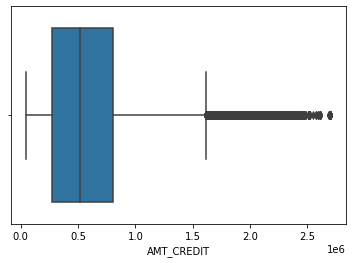

In [58]:
sns.boxplot(df['AMT_CREDIT'])
plt.show()

#### DAYS_EMPLOYED 

In [59]:
df.DAYS_EMPLOYED.describe()

count    307411.00000
mean      67741.17798
std      139457.55706
min           0.00000
25%         933.00000
50%        2219.00000
75%        5707.00000
max      365243.00000
Name: DAYS_EMPLOYED, dtype: float64

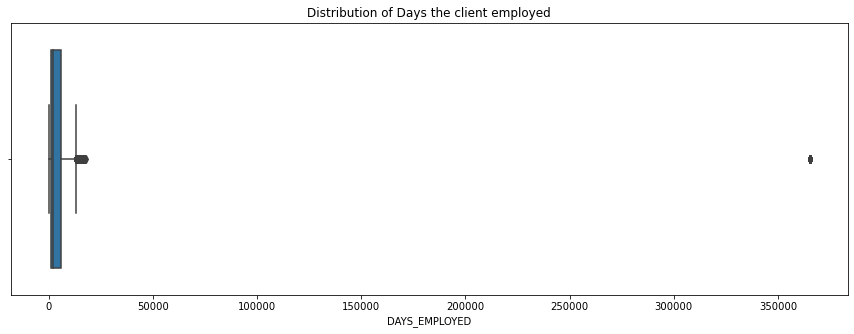

In [60]:
plt.figure(figsize=(15,5))
sns.boxplot(df.DAYS_EMPLOYED)
plt.title('Distribution of Days the client employed')

plt.show()

In [61]:
##Remove the outliers
df=df[df['DAYS_EMPLOYED'] <= 800]

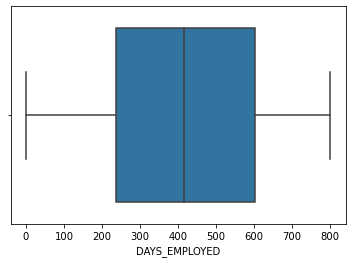

In [62]:
sns.boxplot(df.DAYS_EMPLOYED)

plt.show()

#### DAYS_REGISTRATION

<AxesSubplot:xlabel='DAYS_REGISTRATION'>

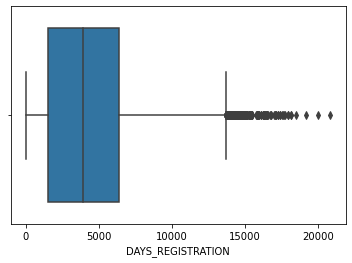

In [63]:
df.DAYS_REGISTRATION
sns.boxplot(df['DAYS_REGISTRATION'])

DAYS_REGISTRATION column has no outliers

#### CNT_CHILDREN

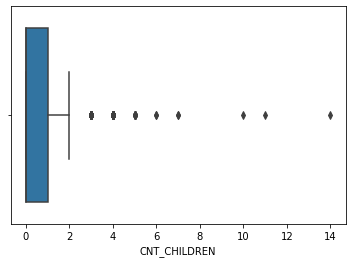

In [64]:
sns.boxplot(df['CNT_CHILDREN'])
plt.show()

In [65]:
##Remove the outliers
df=df[df['CNT_CHILDREN'] <= 6]

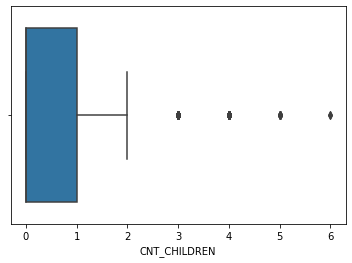

In [66]:
sns.boxplot(df['CNT_CHILDREN'])
plt.show()

### 5. Binning Variables for Analysis

In [67]:
#Creating bins for Credit amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']
df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [68]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [69]:
# Creating bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df['AGE_RANGE']=pd.cut(df['YEARS_BIRTH'],bins,labels=slot)

In [70]:
df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   65770.000000  65770.000000  65770.000000      6.577000e+04   
mean   277914.229451      0.112148      0.496351      1.668311e+05   
std    102754.756783      0.315551      0.743531      9.318865e+04   
min    100002.000000      0.000000      0.000000      2.700000e+04   
25%    189067.250000      0.000000      0.000000      1.125000e+05   
50%    277759.500000      0.000000      0.000000      1.440000e+05   
75%    366609.250000      0.000000      1.000000      2.025000e+05   
max    456251.000000      1.000000      6.000000      3.600000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  6.577000e+04   65770.000000     6.571200e+04   
mean   5.652381e+05   26381.510271     5.053852e+05   
std    3.862159e+05   13824.168829     3.519200e+05   
min    4.500000e+04    2052.000000     4.050000e+04   
25%    2.700000e+05   16155.000000     2.250000e+05   
50%    4.737600e+05   24543.000000     4.500000e+05   
75%    7.650000e+05   33493.500000     6.750000e+05   
max    2.700000e+06  177826.500000     2.700000e+06   

       REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
count                65770.000000   65770.000000       65770.000000   
mean                     0.021067     424.820937        4267.460027   
std                      0.014035     208.450487        3109.242162   
min                      0.000290       0.000000           0.000000   
25%                      0.010006     237.000000        1538.250000   
50%                      0.018850     415.000000        3922.000000   
75%                      0.028663     603.000000        6391.750000   
max                      0.072508     800.000000       20841.000000   

       DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  \
count     65770.000000             65770.000000  65616.000000   
mean       2619.009792                12.312848      0.491761   
std        1506.342987                 3.309396      0.196425   
min           0.000000                 0.000000      0.000005   
25%        1292.000000                10.000000      0.357150   
50%        2583.000000                12.000000      0.539972   
75%        4043.000000                15.000000      0.649025   
max        6259.000000                23.000000      0.855000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              65525.000000              65525.000000   
mean                   1.375902                  0.139702   
std                    2.230287                  0.433460   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                   30.000000                  6.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count              65525.000000              65525.000000   
mean                   1.358993                  0.097581   
std                    2.210990                  0.352593   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                   29.000000                  5.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                54829.000000               54829.000000   
mean                     0.006803                   0.007733   
std                      0.090036                   0.118716   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      3.000000            

### 6. Univariate Analysis

In [71]:
#creating new dataframes
target_0 = df[df["TARGET"]==0]
target_1 = df[df["TARGET"]==1]


In [72]:
target_0.shape

(58394, 50)

In [73]:
target_1.shape

(7376, 50)

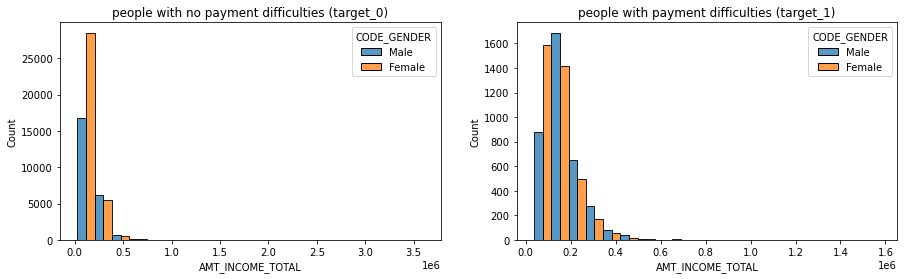

In [74]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.histplot(data = target_0, x='AMT_INCOME_TOTAL', bins=20, hue="CODE_GENDER", multiple="dodge")
plt.title("people with no payment difficulties (target_0)")

plt.subplot(1,2,2)
sns.histplot(data = target_1, x='AMT_INCOME_TOTAL', bins=20, hue="CODE_GENDER", multiple="dodge")
plt.title("people with payment difficulties (target_1)")

plt.show()


- In both the target_0 and target_1, Females count are more than Males in AMT_INCOME_TOTAL.
- In target_0 the number of Males are very high as compare to the number of Males of target1.

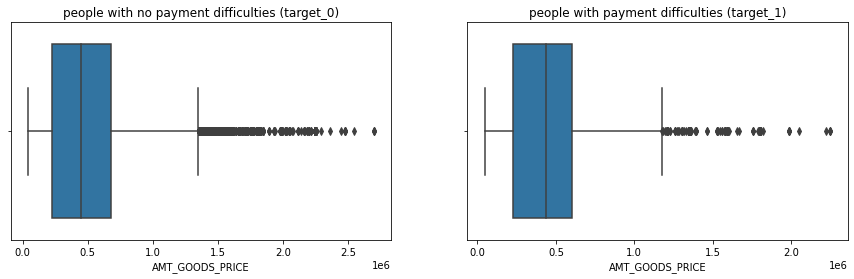

In [75]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(data = target_0, x="AMT_GOODS_PRICE")
plt.title("people with no payment difficulties (target_0)")

plt.subplot(1,2,2)
sns.boxplot(data = target_1, x="AMT_GOODS_PRICE")
plt.title("people with payment difficulties (target_1)")

plt.show()

- In both the target_0 and target_1 there are outliers in AMT_GOODS_PRICE.
- Where in target_1 we can see the third quartile is slightly bigger than other quartiles, and in target_0 the quartiles seems equal.

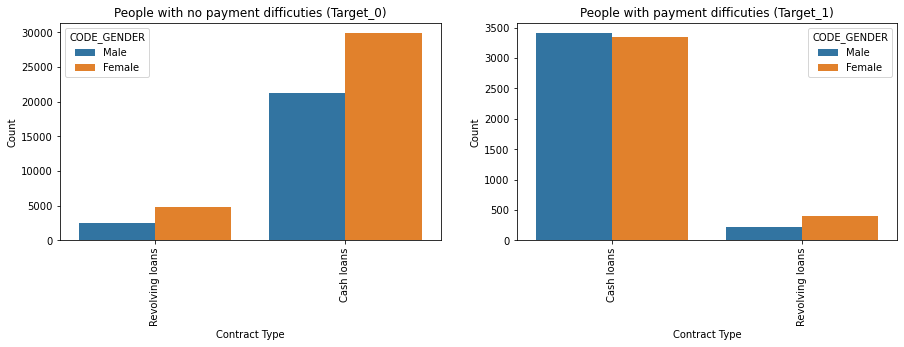

In [76]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["NAME_CONTRACT_TYPE"], hue=target_0["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["NAME_CONTRACT_TYPE"], hue=target_1["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()

- In both the target_0 and target_1 the requirement of Cash Loans are high as compare to Revolving Loans, regardless of the genders.
- Female Count is higher in both the target_0 and target_1 regardless of the contract type.

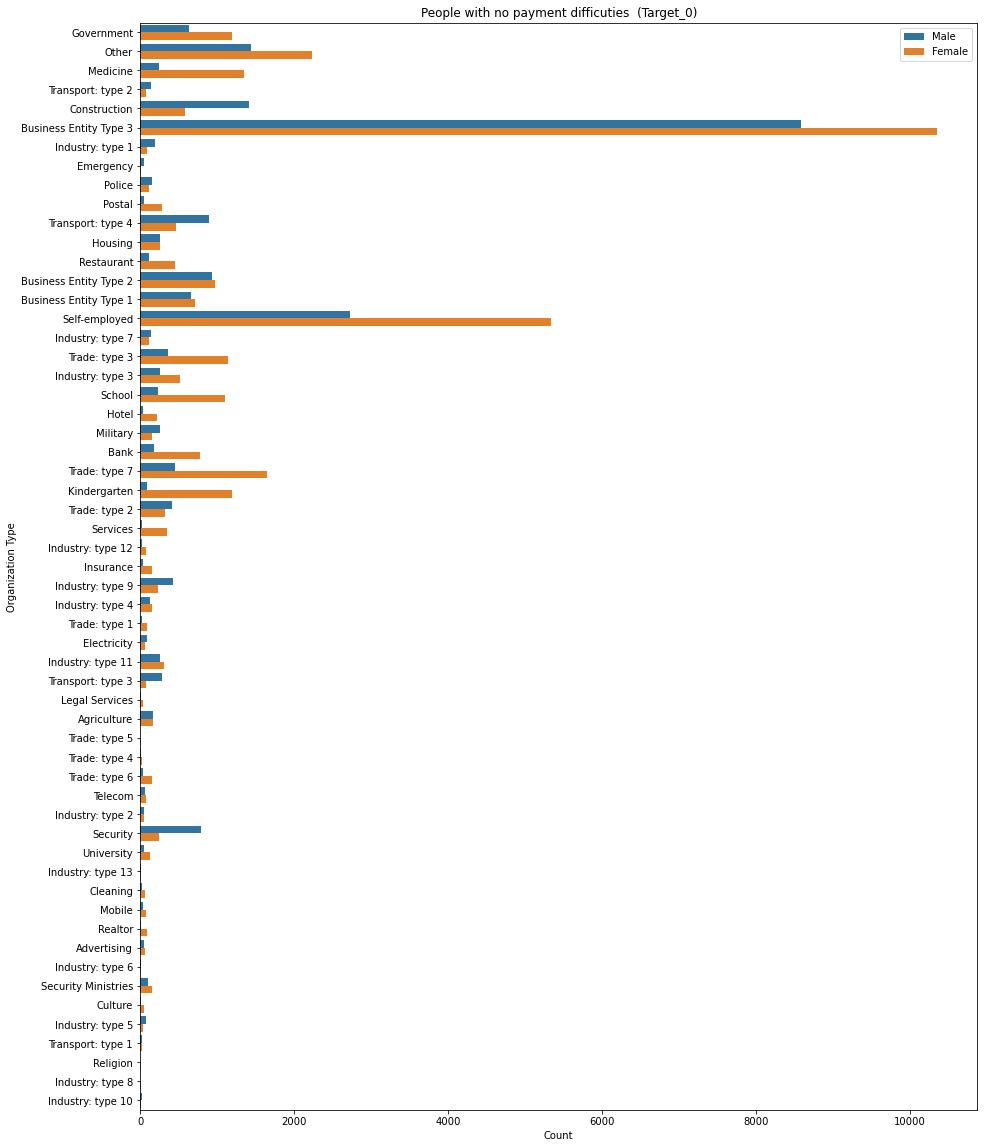

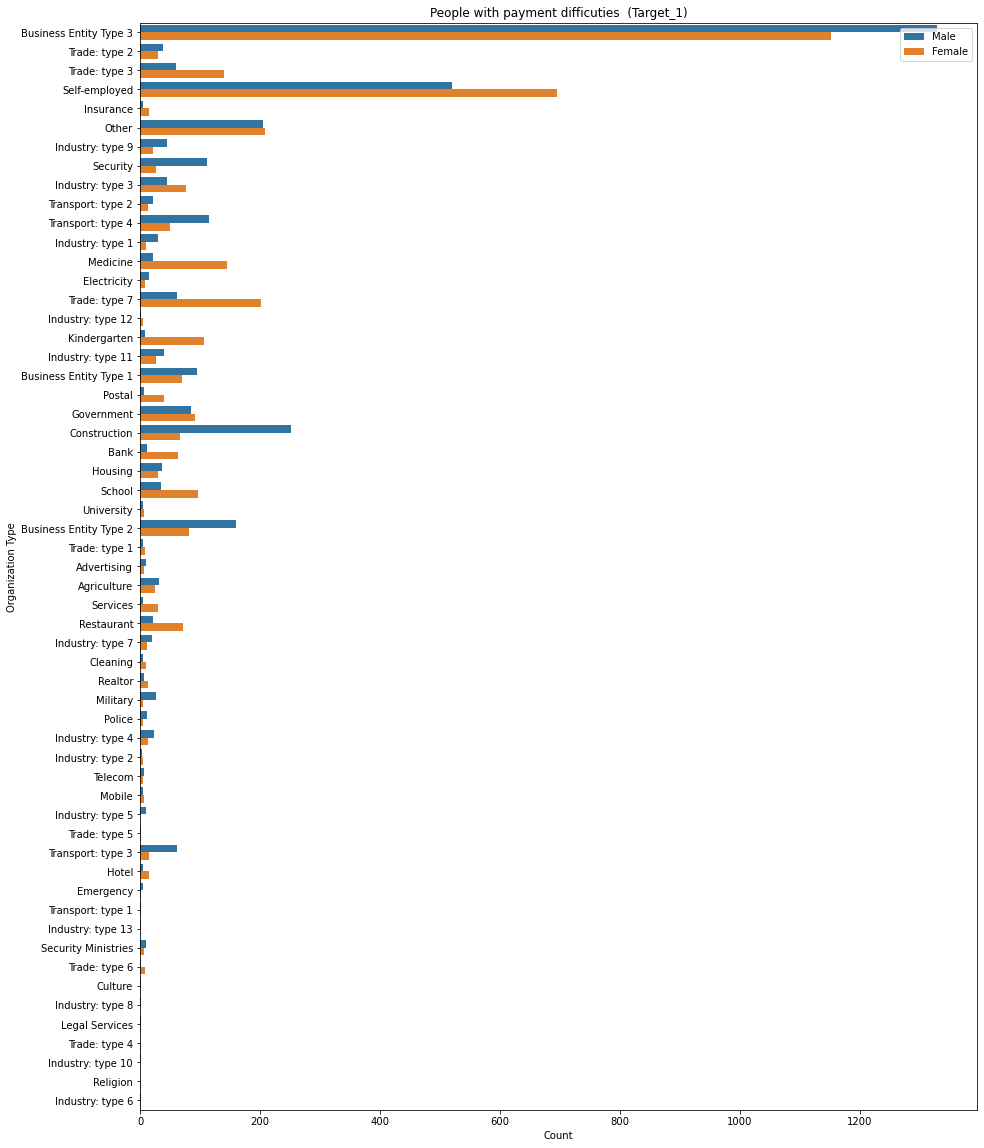

In [77]:
plt.figure(figsize=(15,20))

sns.countplot(y=target_0["ORGANIZATION_TYPE"], hue=target_0["CODE_GENDER"], dodge=True)
plt.title("People with no payment difficuties  (Target_0)")
plt.ylabel("Organization Type")
plt.xlabel("Count")
plt.legend(loc=1)

plt.figure(figsize=(15,20))

sns.countplot(y=target_1["ORGANIZATION_TYPE"], hue=target_1["CODE_GENDER"], dodge=True)
plt.title("People with payment difficuties  (Target_1)")
plt.ylabel("Organization Type")
plt.xlabel("Count")
plt.legend(loc=1)

plt.show()

- We have highest number of application from the Organization Type of Business Entity Type-3 in target_0.
- Lowest number of application from the Organization Type are Industry Type-6 and Industry Type-10 in target_0.
- We have highest number of application from the Organization Type of Business Entity Type-3 in target1.
- Lowest number of application from the Organization Type are Cleaning and Industry Type-12 in target1.

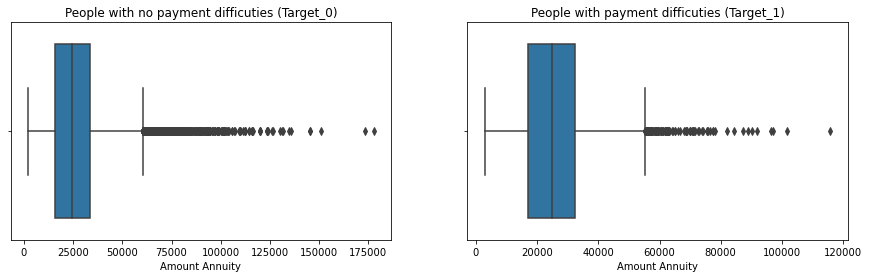

In [78]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x=target_0["AMT_ANNUITY"])
plt.title("People with no payment difficuties (Target_0)")
plt.xlabel("Amount Annuity")

plt.subplot(1,2,2)
sns.boxplot(x=target_1["AMT_ANNUITY"])
plt.title("People with payment difficuties (Target_1)")
plt.xlabel("Amount Annuity")

plt.show()


- the median values of both the targets of Amount Annuity lies at 30000.

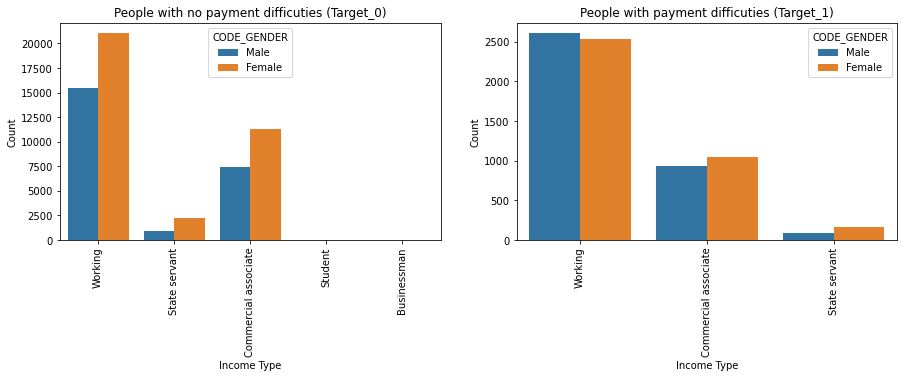

In [79]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["NAME_INCOME_TYPE"], hue=target_0["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["NAME_INCOME_TYPE"], hue=target_1["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()


- The Student, and Businessman are present in the income type of target_0 but they are absent in target_1.
- The number of Females is high as compared to Males in the income type of State Servant, and Commercial Associate irrespective of the targets.

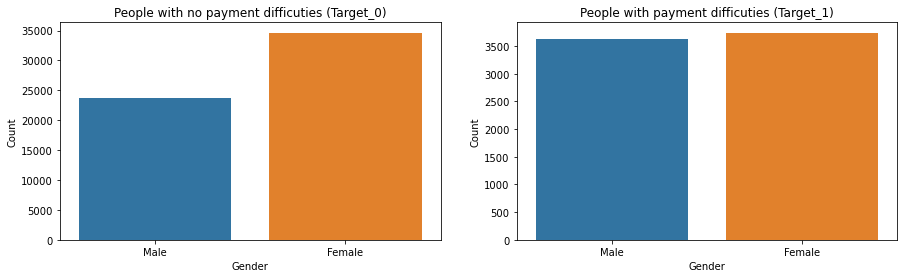

In [80]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["CODE_GENDER"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["CODE_GENDER"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()

- The number of people with payment difficulties (target_1) and non-payment difficulties (target_0) have Females in higher number as compared to Males.

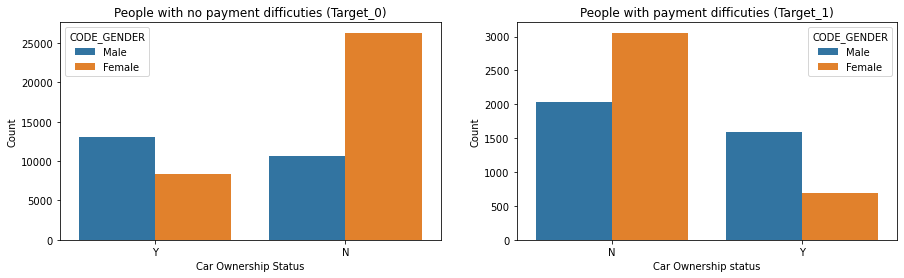

In [81]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["FLAG_OWN_CAR"], hue=target_0["CODE_GENDER"], dodge=True)
plt.xlabel("Car Ownership Status")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["FLAG_OWN_CAR"], hue=target_1["CODE_GENDER"], dodge=True)
plt.xlabel("Car Ownership status")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()


- The Males have higher number of Ownership of Cars in both the target_0 and target_1 as compared to Females.
- the distribution of Non-Onwership of Cars shows maximum number of Females in both the target_0 and target_1.

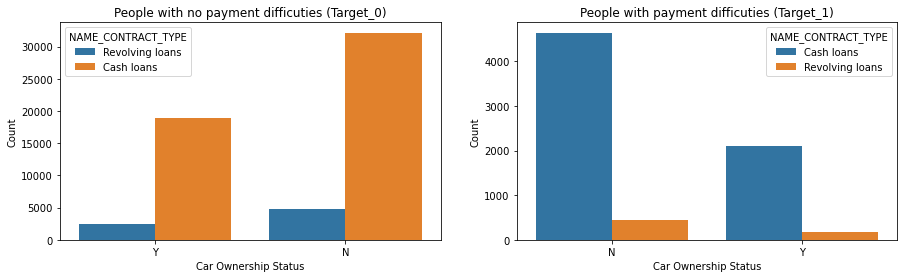

In [82]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["FLAG_OWN_CAR"], hue=target_0["NAME_CONTRACT_TYPE"], dodge=True)
plt.xlabel("Car Ownership Status")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["FLAG_OWN_CAR"], hue=target_1["NAME_CONTRACT_TYPE"], dodge=True)
plt.xlabel("Car Ownership Status")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()

- Those who have Ownership of Cars in both the target_0 and target_1 shows high application in Cash Loans.
- Also those who have Non-Ownership of Cars in both the target_0 and target_1 also shows high application interest in Cash Loans, but the number of applications for Cash Loans are higher for those who have no ownership of cars as compared to those who have the cars.

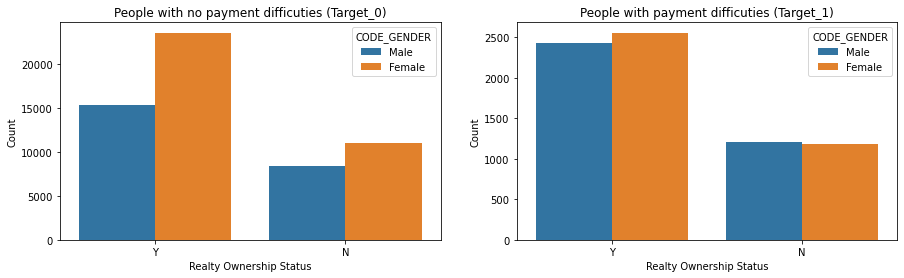

In [83]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["FLAG_OWN_REALTY"], hue=target_0["CODE_GENDER"], dodge=True)
plt.xlabel("Realty Ownership Status")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["FLAG_OWN_REALTY"], hue=target_1["CODE_GENDER"], dodge=True)
plt.xlabel("Realty Ownership Status")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()

- Realty Ownership in both the target_0 and target_1 have Females in higher number as compare to Males.


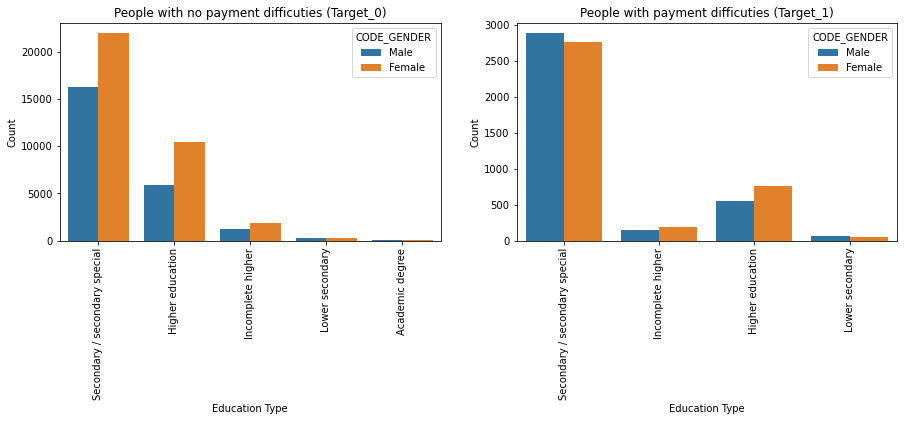

In [84]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["NAME_EDUCATION_TYPE"], hue=target_0["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Education Type")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["NAME_EDUCATION_TYPE"], hue=target_1["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Education Type")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")

plt.show()

- In both the target_0 and target_1 we have the highest number of application from Secondary Special.
- Distribution of Females in both the target_0 and target_1 is high in all types of Education.
- In target_0 we can see the distribution of Males are decreased as compared to Females in all types of Education.
- In target_1 we can see the distribution of Males and Females in all types of Education have only slight difference in application.

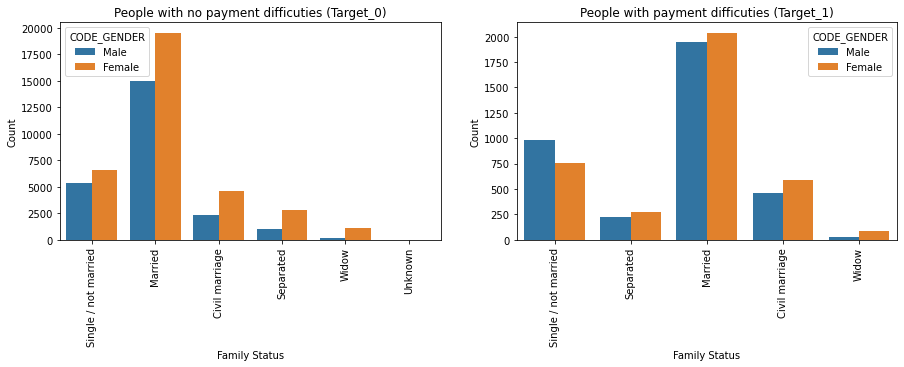

In [85]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x=target_0["NAME_FAMILY_STATUS"], hue=target_0["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Family Status")
plt.ylabel("Count")
plt.title("People with no payment difficuties (Target_0)")

plt.subplot(1,2,2)
sns.countplot(x=target_1["NAME_FAMILY_STATUS"], hue=target_1["CODE_GENDER"], dodge=True)
plt.xticks(rotation=90)
plt.xlabel("Family Status")
plt.ylabel("Count")
plt.title("People with payment difficuties (Target_1)")


plt.show()


- In both the target_0 and target_1 the highest distribution are of Married peoples and the lowest distribution is of Widow's, irrespective of their gender.
- We have Females in target_1 in higher numbers as compare to Males, which means Females of all type of Family Status are more likely to default.
- We can also see in target_0 the the distribution of Females are higher as compared to Males, so that's why the target1 have also high distribution of Females.

###  7. Bivariate Analysis

#### Numeric - Numeric Analysis

<Figure size 432x144 with 0 Axes>

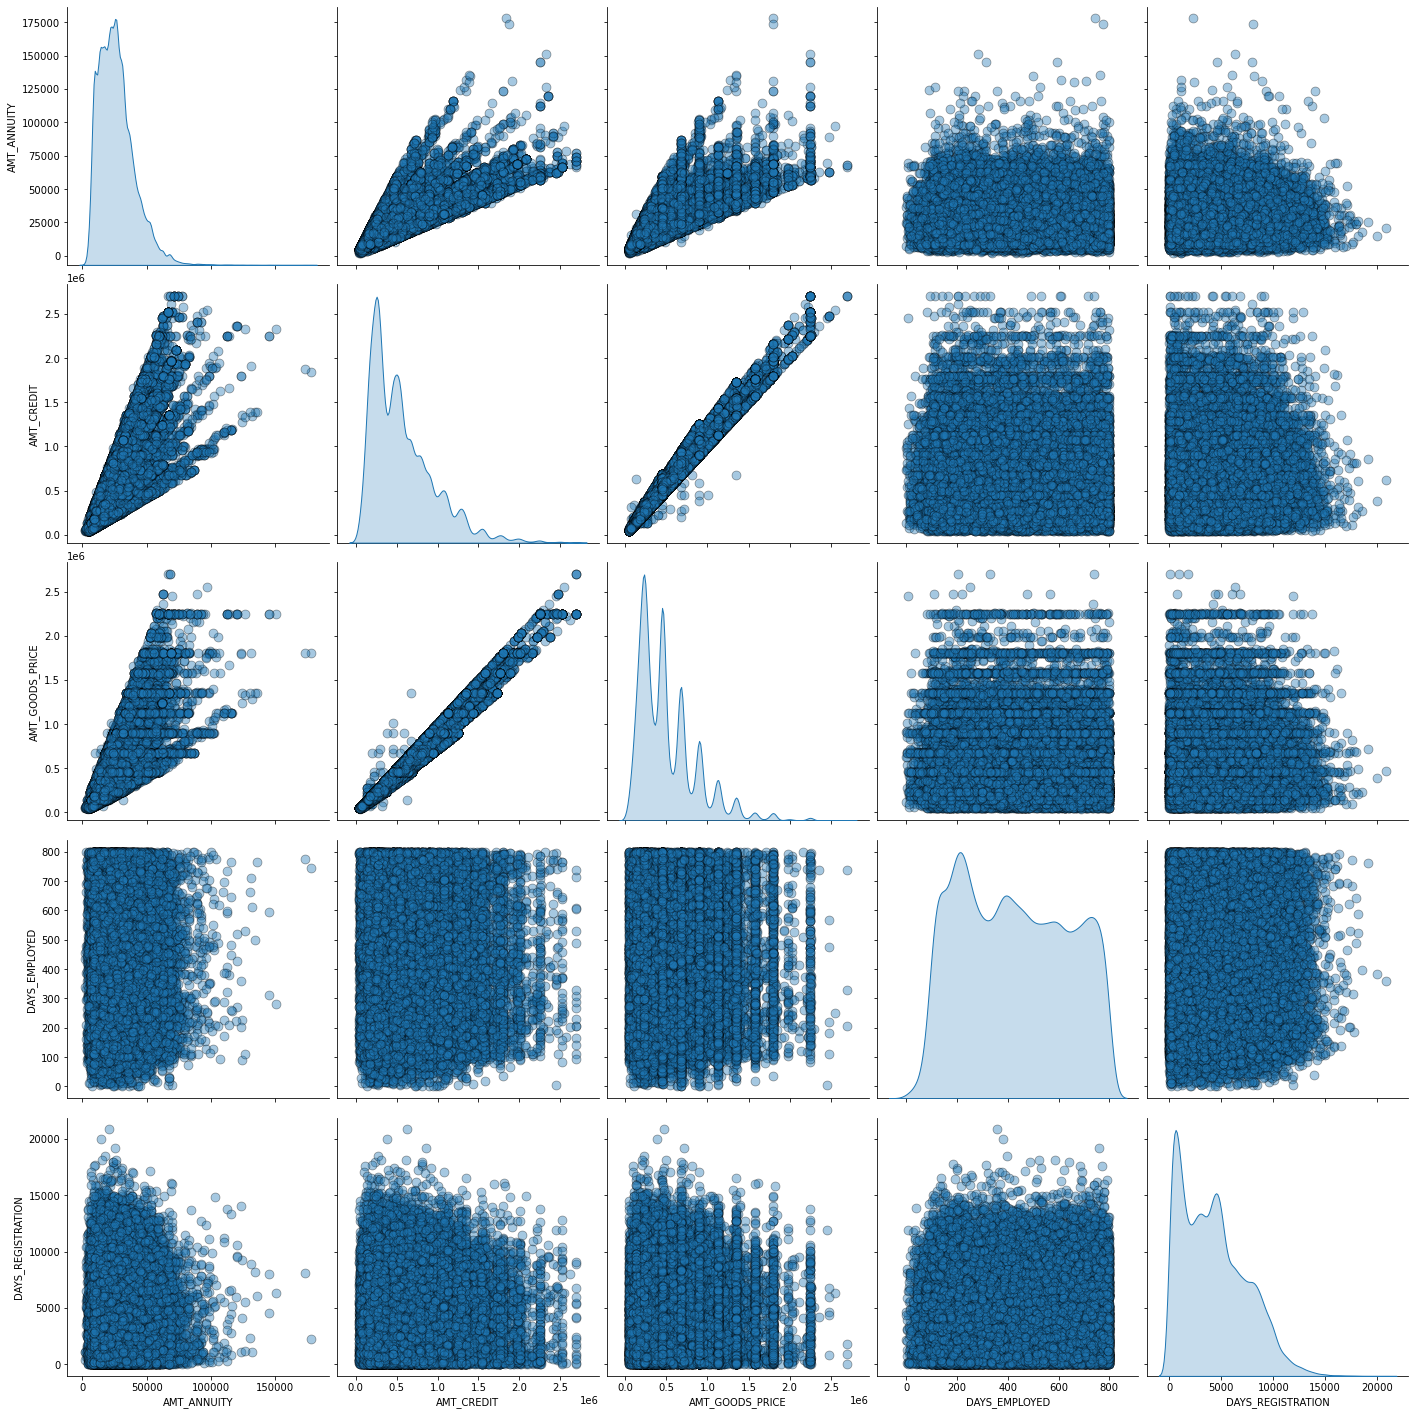

In [86]:
#plotting the relation between numeric vriables
plt.figure(figsize=[6,2])
sns.pairplot(df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

- There is not such correlation can be observed from the above pairplot
- Linear correlation present between AMT_GOODS_PRICE vs AMT_CREDIT , AMT_GOODS_PRICE vs AMT_ANNUITY

#### Numeric - Categorical Analysis

In [87]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=df)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}') 
    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    
    plt.show()

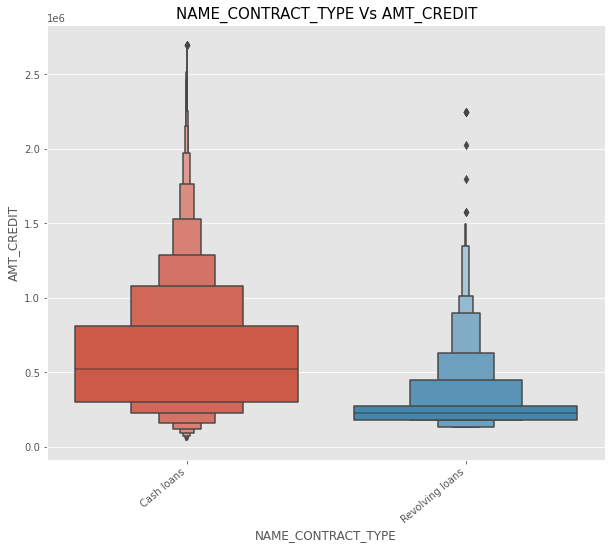

In [88]:
#by-varient analysis of Contract type and Amt credit of previous appliction
plot_by_cat_num('NAME_CONTRACT_TYPE', 'AMT_CREDIT')

- There is huge difference between 75th quartile in cash loans and revolving loans
- There are some outliers present in cash loan
- Number of clients is very high for cash loans than revolving loan

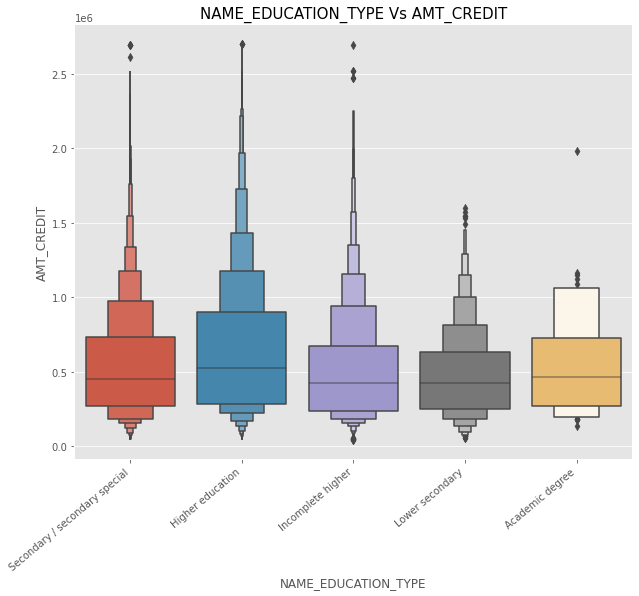

In [89]:
#by-varient analysis of name education type and Amt credit of previous appliction
plot_by_cat_num('NAME_EDUCATION_TYPE', 'AMT_CREDIT')


- median is approximatey same for each education type
- Number of outliers are present for each education type

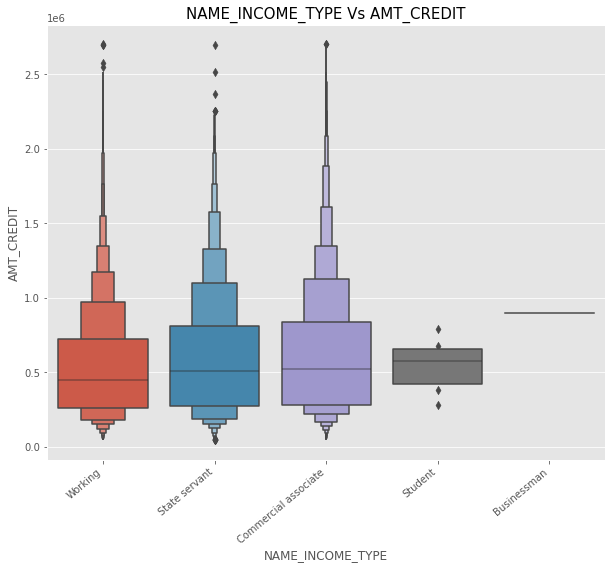

In [90]:
#by-varient analysis of name income type and Amt credit of previous appliction
plot_by_cat_num('NAME_INCOME_TYPE', 'AMT_CREDIT')


- Number of outliers are more for woeking and commercial associate as compared to state servant
- Median is heighest for commercial associate


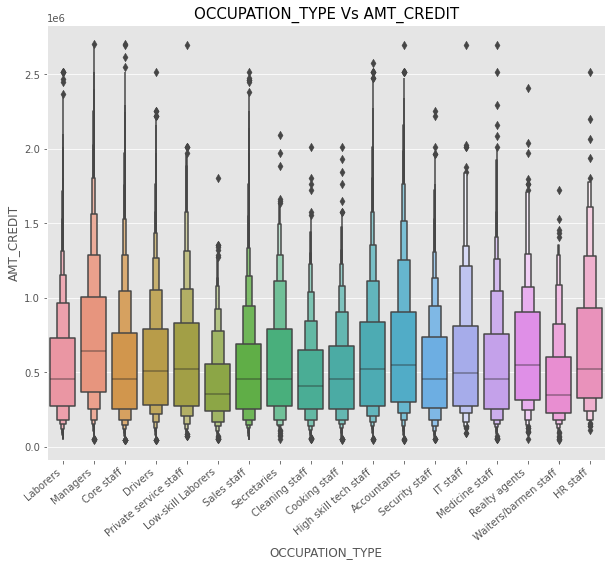

In [91]:
#by-varient analysis of name income type and Amt credit of previous appliction
plot_by_cat_num('OCCUPATION_TYPE', 'AMT_CREDIT')


- Number of outliers is also more for each occupation type
- Median of occupation type Managers is heighest 

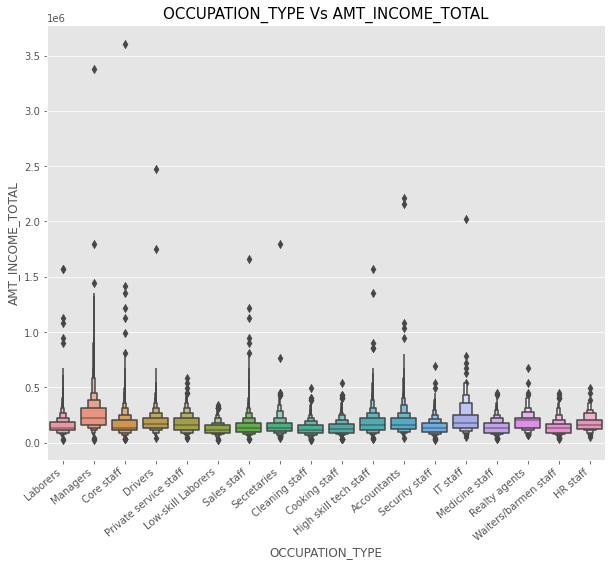

In [92]:
#by-varient analysis of name income type and Amt credit of previous appliction
plot_by_cat_num('OCCUPATION_TYPE', 'AMT_INCOME_TOTAL')


- Occupation type Managers have heighest income total
- Cleaning staff, cooking staff ,Low skill laboreres have lowest income total


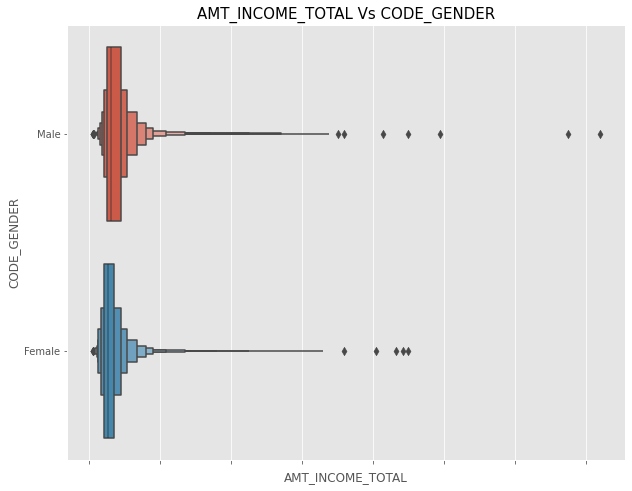

In [93]:
#by-varient analysis of name income type and Amt credit of previous appliction
plot_by_cat_num('AMT_INCOME_TOTAL', 'CODE_GENDER')


- Number of outliers are more for male gender
- Median of income total is more of male gender as compared with female gender

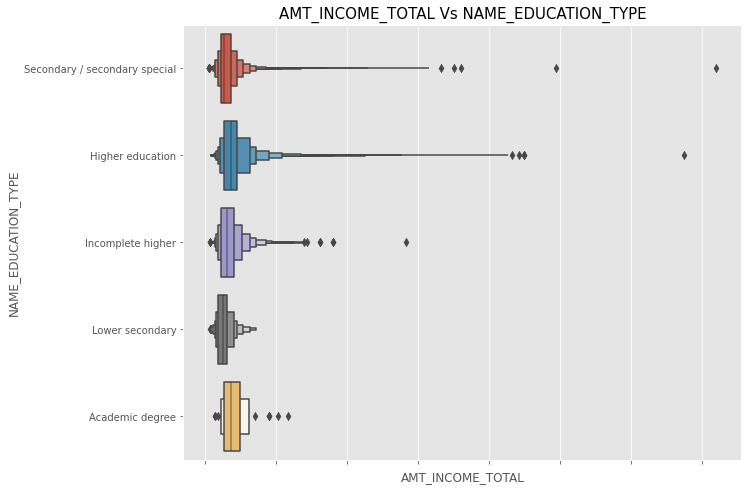

In [94]:
#by-varient analysis of name income type and Amt credit of previous appliction
plot_by_cat_num('AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE')


- More outliers present in the education type Higher education and secondary special
- Median of income total is lowest for education type lower secondary


#### Categorical - Categorical

In [95]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = df.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

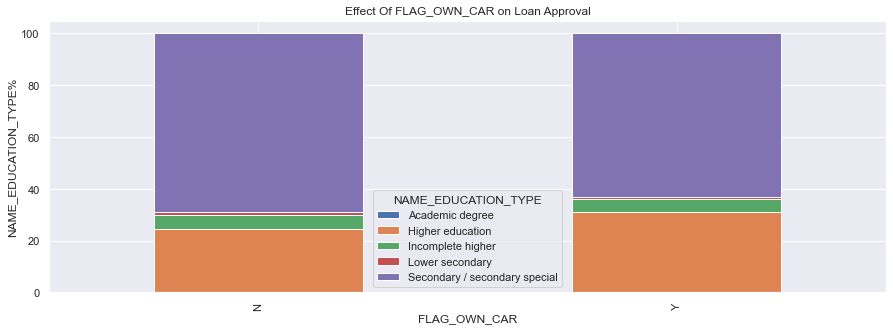

In [96]:
plotuni_combined('FLAG_OWN_CAR','NAME_EDUCATION_TYPE')

- Clients with Education type academic are not available in data
- Clients having education type Secondary/secondary special have heighest number of cars


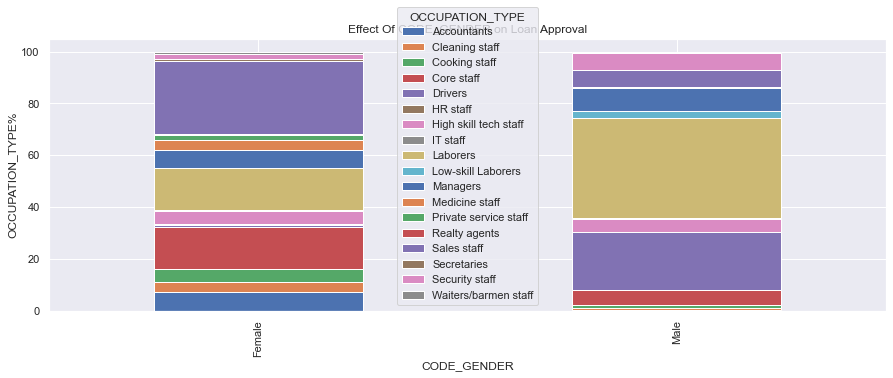

In [97]:
plotuni_combined('CODE_GENDER','OCCUPATION_TYPE')

- Very few Female and male clints are present having occupation type HR staff and IT staff 
- Proportion of male and female clients with occupation type managers is some what same.
- Proportion of female clients is more having occupation type Core staff, Sales staff , Accountants , cleaning staff , cooking staff and unknown
- Very less male clients present in Reality agents, Private service staff, Medicine staff, Waiters/barmen staff
- Number of male cilents is more in Drivers, Security staff and Laborers

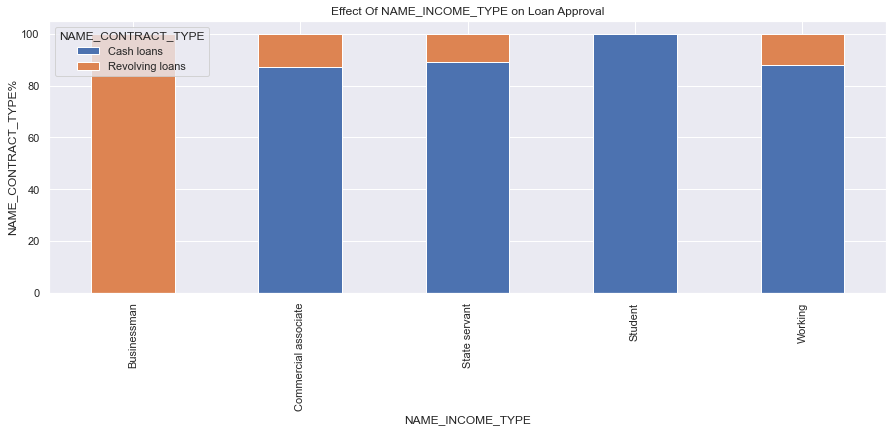

In [98]:
plotuni_combined('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE')

- There is not any correlation between income type Businessman and Student
- Number of cash loan client is very high for students

### 8. Multivariate Analysis

In [99]:
res = pd.pivot_table(data=df, index='OCCUPATION_TYPE', columns='NAME_CONTRACT_TYPE', values='TARGET')
res

NAME_CONTRACT_TYPE     Cash loans  Revolving loans
OCCUPATION_TYPE                                   
Accountants              0.062992         0.044118
Cleaning staff           0.105730         0.094017
Cooking staff            0.130859         0.107345
Core staff               0.085555         0.061753
Drivers                  0.140812         0.100000
HR staff                 0.099237         0.037037
High skill tech staff    0.084206         0.071960
IT staff                 0.120301         0.000000
Laborers                 0.142172         0.091768
Low-skill Laborers       0.221140         0.082192
Managers                 0.095572         0.056604
Medicine staff           0.094324         0.098039
Private service staff    0.090361         0.051282
Realty agents            0.097826         0.095238
Sales staff              0.116818         0.091360
Secretaries              0.099656         0.068182
Security staff           0.126783         0.091371
Waiters/barmen staff     0.149296         0.118644

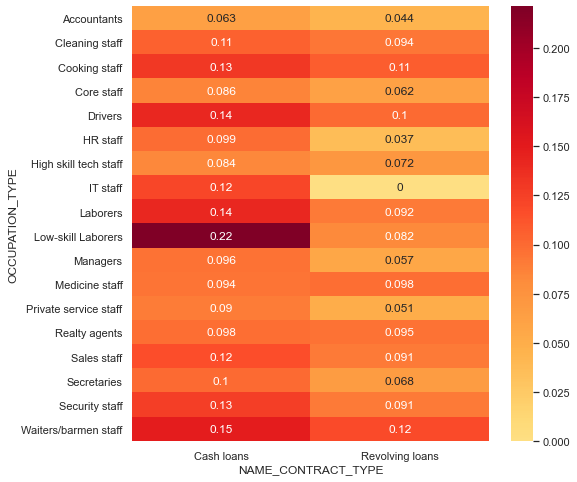

In [100]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='YlOrRd', center=0.081)
plt.show()

- Low-skill Laborers and cash loans have highest correlation of 0.22
- IT staff and revolving loans have no correlation at all.


In [101]:
res = pd.pivot_table(data=df, index='NAME_EDUCATION_TYPE', columns='NAME_CONTRACT_TYPE', values='TARGET')
res

NAME_CONTRACT_TYPE             Cash loans  Revolving loans
NAME_EDUCATION_TYPE                                       
Academic degree                  0.000000         0.000000
Higher education                 0.077704         0.049651
Incomplete higher                0.102117         0.069632
Lower secondary                  0.171429         0.106383
Secondary / secondary special    0.131908         0.096247

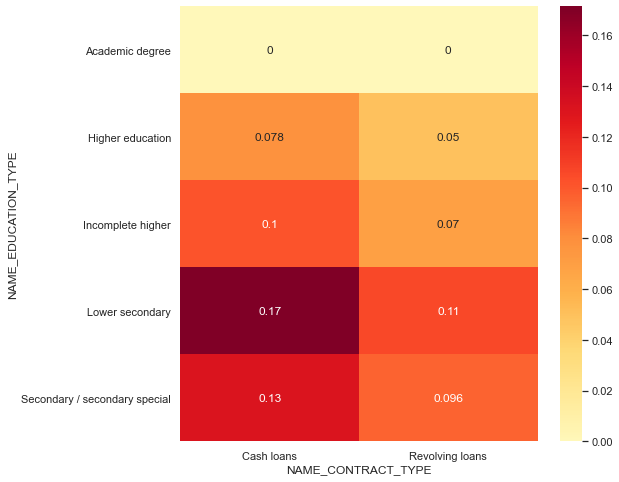

In [102]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='YlOrRd', center=0.081)
plt.show()

- Highest correlation is between lower secondary and cash loans
- Higher education and revolving loans have lower correlation of 0.05


In [103]:
res = pd.pivot_table(data=df, index='OCCUPATION_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
res

NAME_EDUCATION_TYPE    Academic degree  Higher education  Incomplete higher  \
OCCUPATION_TYPE                                                               
Accountants                        0.0          0.048161           0.035211   
Cleaning staff                     NaN          0.088608           0.133333   
Cooking staff                      0.0          0.100000           0.074074   
Core staff                         0.0          0.057572           0.101818   
Drivers                            0.0          0.115445           0.111765   
HR staff                           NaN          0.038095           0.166667   
High skill tech staff              NaN          0.059350           0.059459   
IT staff                           NaN          0.056818           0.040000   
Laborers                           0.0          0.091820           0.101420   
Low-skill Laborers                 0.0          0.125000           0.090909   
Managers                           0.0          0.073919           0.099602   
Medicine staff                     NaN          0.076923           0.028571   
Private service staff              0.0          0.052632           0.074074   
Realty agents                      NaN          0.081081           0.333333   
Sales staff                        0.0          0.089844           0.103611   
Secretaries                        NaN          0.100629           0.088235   
Security staff                     0.0          0.130435           0.177778   
Waiters/barmen staff               NaN          0.106667           0.159091   

NAME_EDUCATION_TYPE    Lower secondary  Secondary / secondary special  
OCCUPATION_TYPE                                                        
Accountants                   0.166667                       0.089286  
Cleaning staff                0.062500                       0.106504  
Cooking staff                 0.166667                       0.132667  
Core staff                    0.058824                       0.106460  
Drivers                       0.093333                       0.142487  
HR staff                           NaN                       0.195122  
High skill tech staff         0.230769                       0.104993  
IT staff                      0.000000                       0.208333  
Laborers                      0.200000                       0.144188  
Low-skill Laborers            0.225000                       0.213277  
Managers                      0.250000                       0.113772  
Medicine staff                0.260870                       0.095866  
Private service staff         0.000000                       0.096852  
Realty agents                      NaN                       0.084034  
Sales staff                   0.152778                       0.120206  
Secretaries                   0.000000                       0.092199  
Security staff                0.137931                       0.120759  
Waiters/barmen staff          0.111111                       0.153846

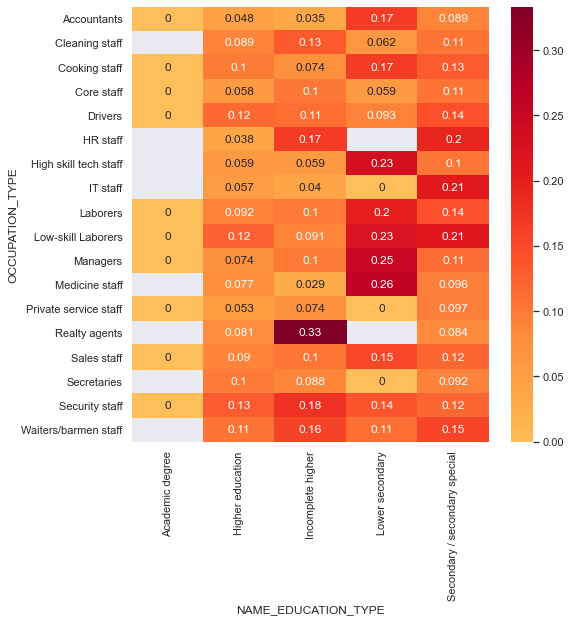

In [104]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='YlOrRd', center=0.081)
plt.show()

- Higher correlation is between realty agents and incomplete higher
- Medicine staff and incomplete higher have lower correlation of 0.029


In [105]:
res = df[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT', 'EXT_SOURCE_2', 'CODE_GENDER', 'NAME_FAMILY_STATUS']].corr()
res

TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  EXT_SOURCE_2
TARGET            1.000000         -0.028441   -0.038494     -0.180785
AMT_INCOME_TOTAL -0.028441          1.000000    0.371524      0.153711
AMT_CREDIT       -0.038494          0.371524    1.000000      0.147529
EXT_SOURCE_2     -0.180785          0.153711    0.147529      1.000000

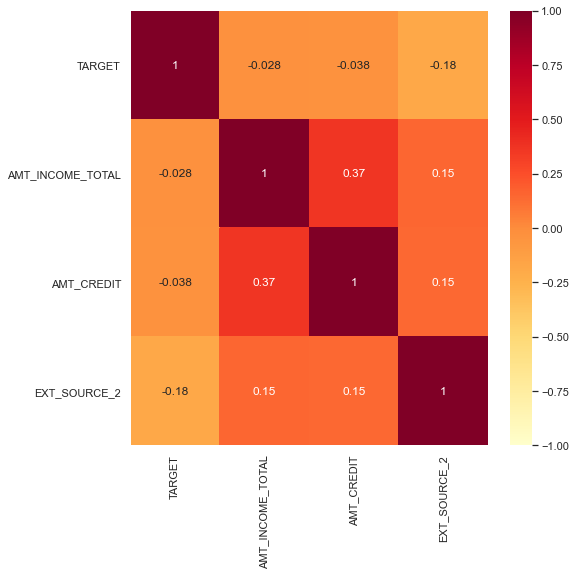

In [106]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='YlOrRd', vmin=-1,vmax=1)
plt.show()

- AMT_INCOME_TOTAL and AMT_CREDIT have higher correlation.
- EXT_SOURCE_2 and TARGET have negative correlation of -0.18


### 9. Correlation 

In [107]:
#finding correlation
corr=df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation  \
403  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998231   
160           AMT_GOODS_PRICE                AMT_CREDIT     0.986020   
430  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.856444   
161           AMT_GOODS_PRICE               AMT_ANNUITY     0.769459   
134               AMT_ANNUITY                AMT_CREDIT     0.768102   
133               AMT_ANNUITY          AMT_INCOME_TOTAL     0.427916   
159           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.378862   
107                AMT_CREDIT          AMT_INCOME_TOTAL     0.371524   
404  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.308644   
377  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.305929   

     Abs_Correlation  
403         0.998231  
160         0.986020  
430         0.856444  
161         0.769459  
134         0.768102  
133         0.427916  
159         0.378862  
107         0.371524  
404         0.308644  
377         0.305929

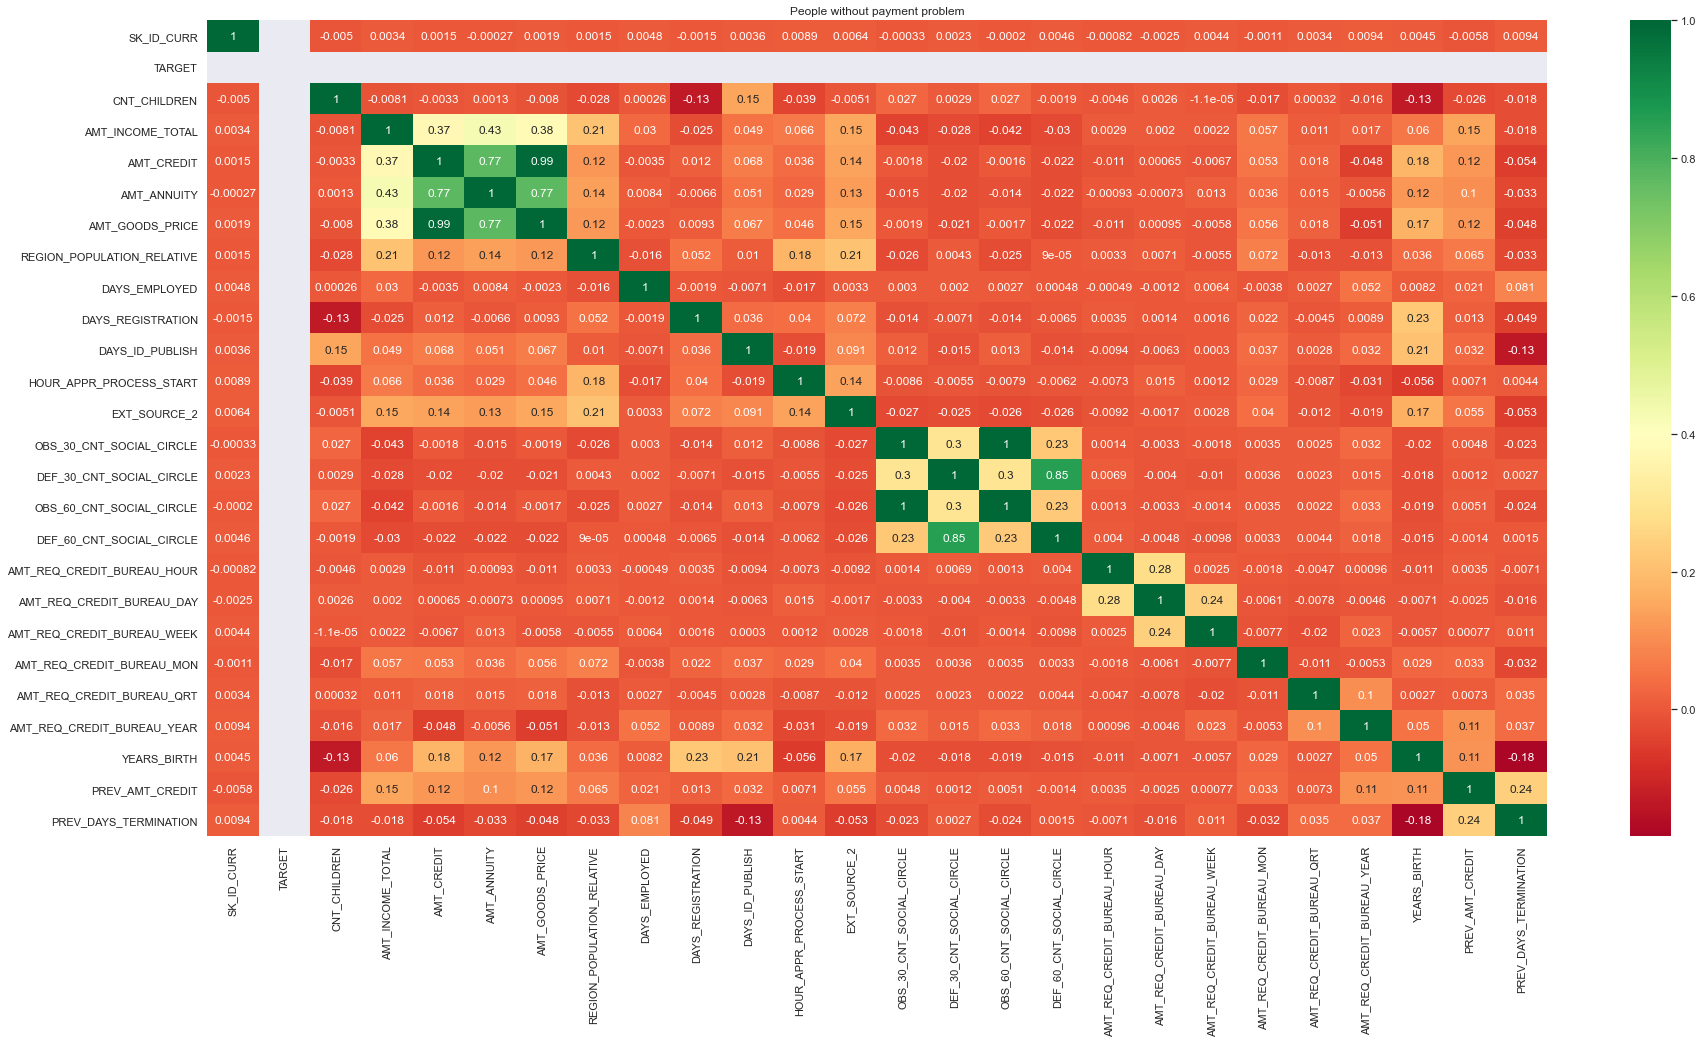

In [108]:
###plot heatmap to find correlation between all numerical variables when target_0
plt.figure(figsize=(30,15)) 
sns.heatmap(target_0.corr(), annot=True , cmap="RdYlGn",center=0.4)
plt.title('People without payment problem')
plt.show()

- AMT_GOODS_PRICE and AMT_CREDIT have heighest correlation around 0.99
- AMT_GOODS_PRICE and AMT_ANNUITY is also showing good correlation


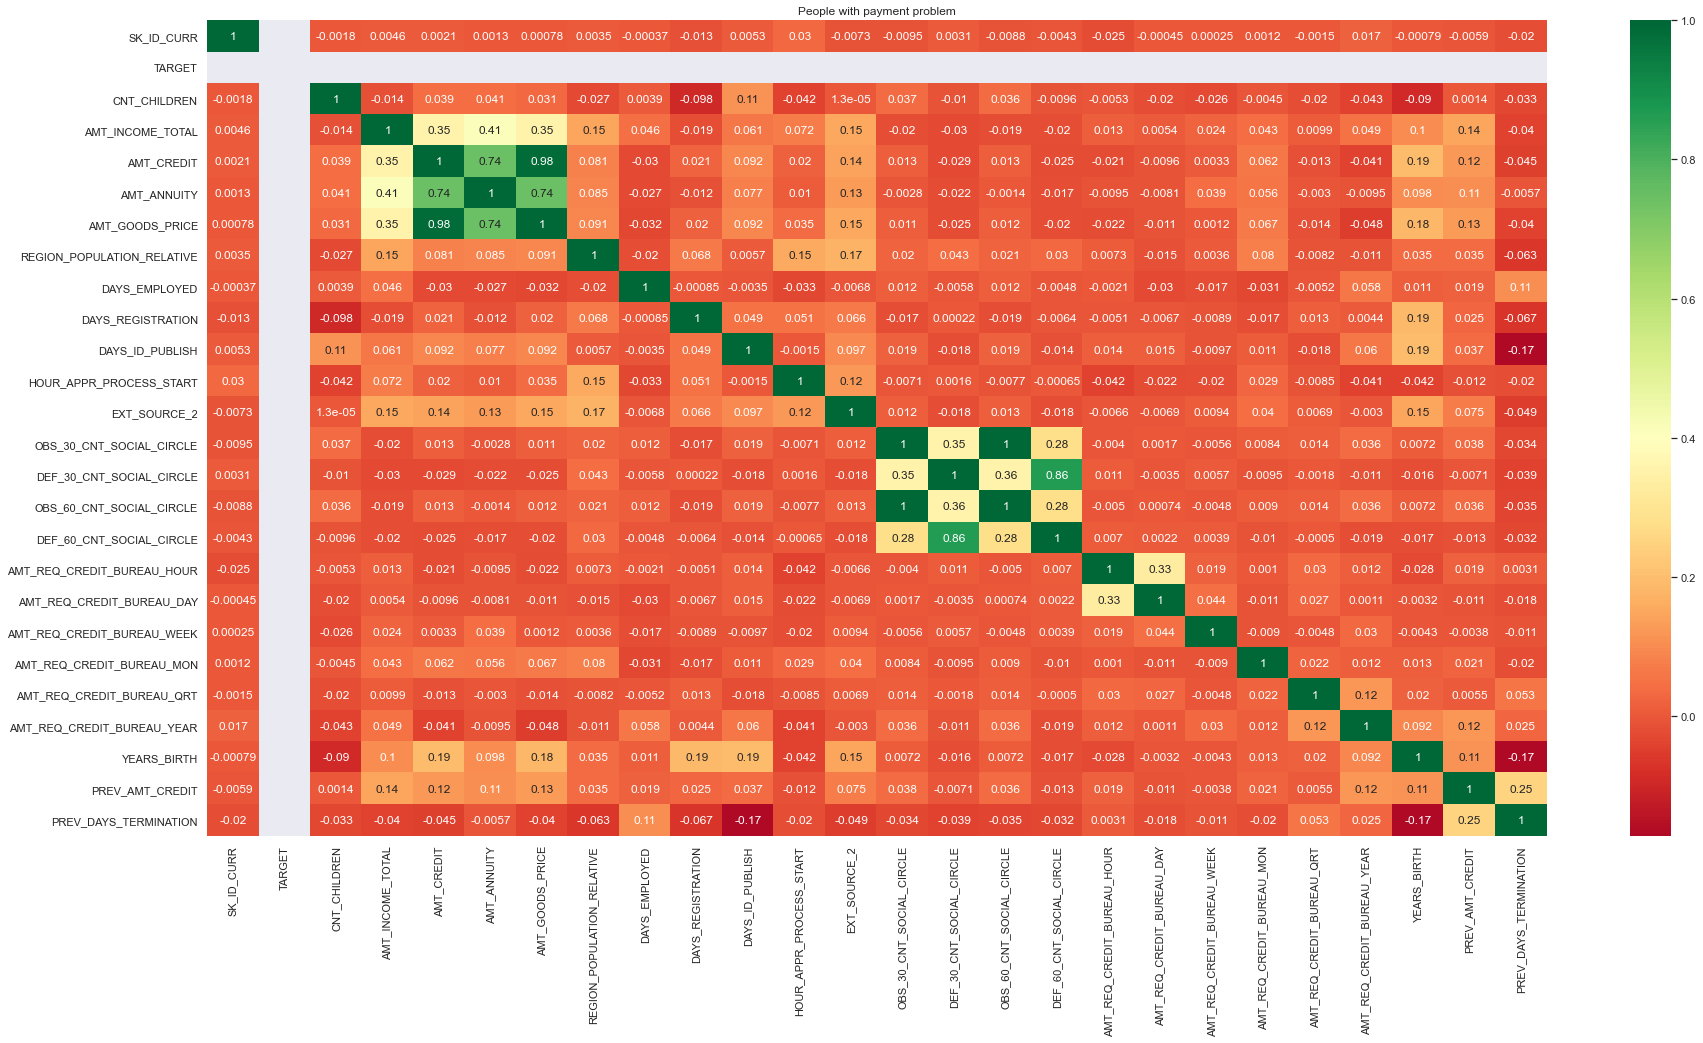

In [109]:
###plot heatmap to find correlation between all numerical variables when target_1
plt.figure(figsize=(30,15)) 
sns.heatmap(target_1.corr(), annot=True, cmap="RdYlGn",center=0.4)
plt.title('People with payment problem')
plt.show()

 - AMT_CREDIT and AMT_GOODS_PRICE have heighest correlation around 0.98